In [7]:
import random
import pandas as pd
import numpy as np
import os
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, KFold, TimeSeriesSplit
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import MinMaxScaler	
i=1
train_df = pd.read_csv(f'./submit/train_building{i}.csv')
    
train_df = train_df.groupby(['day', 'hour'])['power_consumption'].mean().reset_index().pivot(index='day', columns='hour', values='power_consumption')

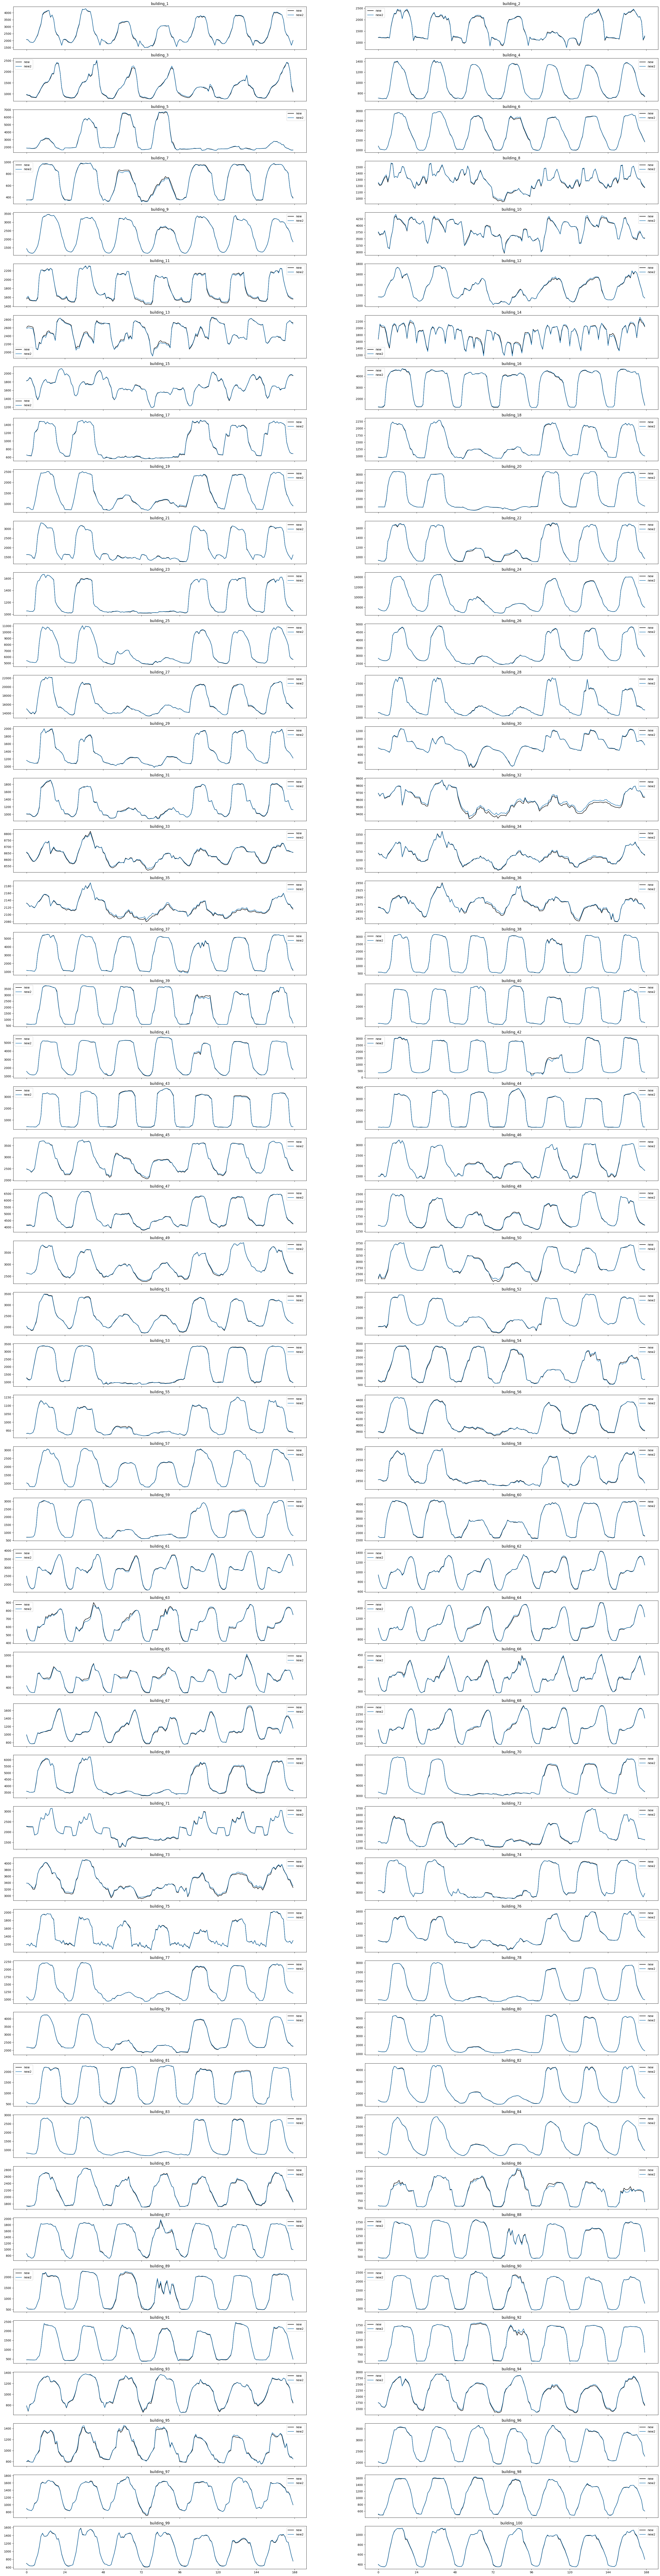

In [11]:
import random
import pandas as pd
import numpy as np
import os
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, KFold, TimeSeriesSplit
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

fig, ax = plt.subplots(50,2,figsize=(40, 160), sharex=True)
ax = ax.flatten() 
xticks = np.arange(0, 169, 24) 
xtick_labels = ['0', '24', '48', '72', '96', '120', '144', '168']
for i in range(1,101,1):
	# 그래프 제목 추가
	ax[i-1].set_title(f"building_{i}")
	#day_hour_mean생성
	train_df = pd.read_csv(f'./submit/train_building{i}.csv')
		# 새로운 행 순서를 지정한 리스트 생성
	train_df = train_df.groupby(['day', 'hour'])['power_consumption'].mean().reset_index().pivot(index='day', columns='hour', values='power_consumption')
	# iloc를 사용하여 행 순서 변경
	new_order = [3,4,5,6,0,1,2]
	train_df = train_df.iloc[new_order]
	day_hour_mean = train_df.values.flatten()
	#데이-아워-민
	#ax[i-1].plot(np.arange(168),day_hour_mean,label = 'day_hour_mean',color='red')	
	#온도 등 column을 보고싶을때
	test_df =  pd.read_csv(f'./submit/test_building{i}.csv')
	temp = test_df['temperature']
	#ax[i-1].plot(np.arange(168),temp,label = 'temp')	


	#best_scores
	#ensemble = pd.read_csv('./submission/ensemble_wsw_noauto.csv')
	submission_autog54_lbw = pd.read_csv('./submission/submission_autog54_lbw.csv')
	submission_autog54_lbw = submission_autog54_lbw.loc[submission_autog54_lbw.index[168*(i-1):168*(i)], 'answer']
	#ax[i-1].plot(np.arange(168),submission_autog54_lbw,label = 'autog54, 5.72')	

	lightGBM_3ensemble =  pd.read_csv('./submission/lightGBM_3ensemble.csv')
	lightGBM_3ensemble = lightGBM_3ensemble.loc[lightGBM_3ensemble.index[168*(i-1):168*(i)], 'answer']
	#ax[i-1].plot(np.arange(168),lightGBM_3ensemble,label = 'lightGBM_3ensemble')

	# submission_xgb_split_lbw = pd.read_csv('./submission/submission_xgb_split_lbw.csv')
	# submission_xgb_holly2_lbw = pd.read_csv('./submission/submission_xgb_holly2_lbw.csv')
	# submission_xgb_noclip_plus_lbw = pd.read_csv('./submission/submission_xgb_noclip_plus_lbw.csv')
	#plot할 csv불러오기
	new_pred =  pd.read_csv('./submission/ensemble_wsw_col.csv')
	new =  new_pred.loc[new_pred.index[168*(i-1):168*(i)], 'answer']
	new_pred2 =  pd.read_csv('./submission/ensemble_wsw_col433.csv')
	new2 =  new_pred2.loc[new_pred2.index[168*(i-1):168*(i)], 'answer']

	xgboost_simple = pd.read_csv('./submission/submission_xgb_drop.csv')
	xgboost_simple = xgboost_simple.loc[xgboost_simple.index[168*(i-1):168*(i)], 'answer']

	lightGBM_simple = pd.read_csv('./submission/lightGBM_wsw_col.csv')
	lightGBM_simple = lightGBM_simple.loc[lightGBM_simple.index[168*(i-1):168*(i)], 'answer']

	CatBoost_simple = pd.read_csv('./submission/CatBoost_wsw_col.csv')
	CatBoost_simple = CatBoost_simple.loc[CatBoost_simple.index[168*(i-1):168*(i)], 'answer']
	#plot

	#ax[i-1].plot(np.arange(168),CatBoost_simple,label = 'CatBoost_simple',color='b')
	#ax[i-1].plot(np.arange(168),lightGBM_simple,label='lightGBM_simple',color='m')	
	#ax[i-1].plot(np.arange(168),xgboost_simple,label = 'xgboost_simple',color='g')
	ax[i-1].plot(np.arange(168),new,label = 'new',color='black')
	ax[i-1].plot(np.arange(168),new2,label = 'new2')
	ax[i-1].set_xticks(xticks)
	ax[i-1].set_xticklabels(xtick_labels)
	ax[i-1].legend()
plt.show()